In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

from os import listdir
from os.path import isfile, join
import random

In [2]:
# This is needed to display the images.
%matplotlib inline

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

In [3]:
from utils import label_map_util

from utils import visualization_utils as vis_util

In [4]:
PATH_TO_CKPT = "/Users/IM053/PycharmProjects/models/object_detection/output_inference_graph_exclude17.pb"
PATH_TO_LABELS = "/data/dev/4_new/label_map.pbtxt"
NUM_CLASSES = 22

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [5]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [6]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [7]:
IMAGE_SIZE = (12, 8)

In [8]:
mypath = "/data/dev/8_new/Ext2/"
img_file_list = [f for f in listdir(mypath) if isfile(join(mypath, f))]


/data/dev/8_new/Ext2/1610768309_b.jpg
자켓: 98%
가방: 20%
[[ 0.98049599  0.20776451  0.17938827  0.13605873  0.1283686   0.04665234
   0.037844    0.03351394  0.02590877  0.02036113  0.01802183  0.01617731
   0.01568721  0.01417661  0.01378907  0.01366066  0.0127696   0.01272878
   0.01244337  0.01221299  0.01136268  0.01117721  0.01117136  0.01102495
   0.00914294  0.00852291  0.00811809  0.00740266  0.00685298  0.00674466
   0.00661678  0.00658488  0.00655243  0.00652585  0.00643764  0.00606949
   0.00594746  0.00566489  0.0056202   0.00546357  0.00537439  0.00537224
   0.00535777  0.00533327  0.00520475  0.00514625  0.00513064  0.00511413
   0.00506139  0.00497638  0.00489157  0.00488763  0.00481484  0.00479848
   0.00479081  0.00477744  0.00475947  0.00462223  0.0045632   0.00454732
   0.00454614  0.00453908  0.00451573  0.00449582  0.00448648  0.00439398
   0.00437531  0.00426581  0.00425504  0.00413951  0.0041363   0.00411239
   0.00408042  0.00406053  0.00405698  0.00403742  0.00403

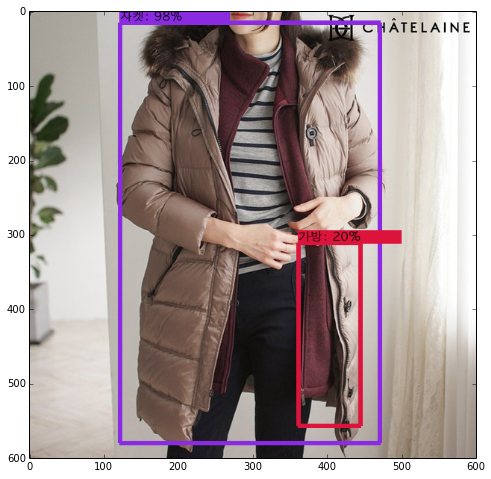

In [17]:
random_no = random.randint(0, len(img_file_list) - 1)
image_path= mypath + img_file_list[random_no]
print image_path

with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    scores = detection_graph.get_tensor_by_name('detection_scores:0')
    classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    # Actual detection.
    (boxes, scores, classes, num_detections) = sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        min_score_thresh=.2,
        line_thickness=6)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
    ima = Image.fromarray(image_np)
    print(scores)
    print(classes)